# Cartoon Filter with OpenCV
### Project by Noirin Graham and Michael Scheidegger

This project is a cartoon filter that takes an image and applies a cartoon effect to it. The cartoon effect is achieved by first applying a bilateral filter to the image to smooth it out and reduce noise. Then, the edges of the image are detected using a Canny edge detector. Finally, the edges are combined with the original image to create a cartoon effect.

The project is implemented using OpenCV, a popular computer vision library. OpenCV provides a wide range of functions for image processing, including filtering, edge detection, and image blending. By combining these functions, we can create a cartoon filter that transforms an image into a cartoon-like representation.

- Required Libraries:
    - OpenCV
    - Numpy
    - Matplotlib

For better comment readability, the [Better Comments](https://marketplace.visualstudio.com/items?itemName=aaron-bond.better-comments) extension is used in this notebook. We recommend installing this extension for better readability.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

Sources:

https://www.kaggle.com/code/bhuviranga/cartoonify-image-step-by-step-guide

https://en.wikipedia.org/wiki/Kernel_(image_processing)


# Testing Phase of the Project



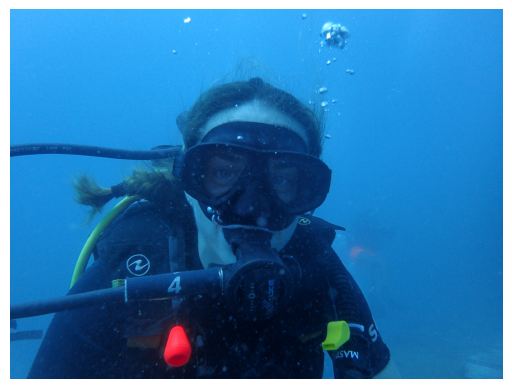

In [3]:
# Load image
image = cv2.imread('P8160078.JPG')

# Display image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

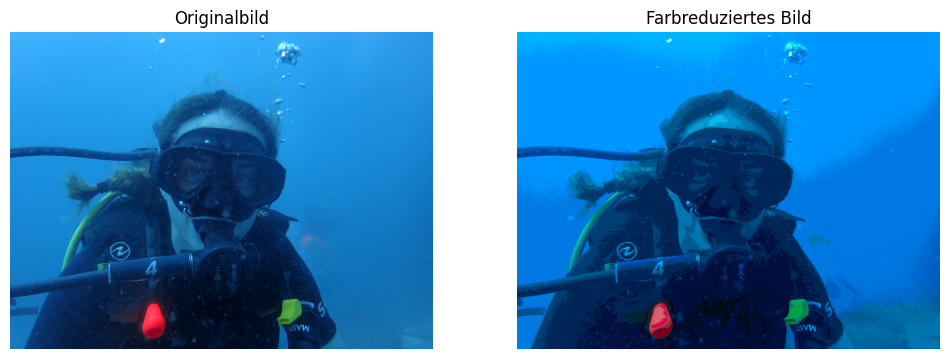

In [85]:
def reduce_colors(image, levels=16):
    """
    Reduces the number of colors in an image using color quantization in the LAB color space.
    
    Parameters:
    - image: The input image in BGR color space (as read by OpenCV).
    - levels: The granularity of quantization, determining how many distinct colors will appear in the output. 
              Smaller values result in fewer colors. Default is 16.
    
    Returns:
    - The color-reduced image in BGR color space, ready to be displayed or processed further.
    """
    # Convert the image from BGR to LAB color space
    img_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    
    # Quantize each channel by reducing the number of distinct values it can take.
    # This is achieved by dividing by 'levels', multiplying by 'levels' and thus reducing granularity.
    img_lab[..., 0] = (img_lab[..., 0] // levels) * levels
    img_lab[..., 1] = (img_lab[..., 1] // levels) * levels
    img_lab[..., 2] = (img_lab[..., 2] // levels) * levels
    
    # Convert the quantized LAB image back to BGR color space for normal image handling in OpenCV
    image_color_reduced = cv2.cvtColor(img_lab, cv2.COLOR_Lab2BGR)
    return image_color_reduced

# Assume 'image' variable has been defined as the image read by OpenCV
# Check if the image was successfully loaded
if image is None:
    print("Das Bild konnte nicht geladen werden.")
else:
    # Apply color reduction with a specified level of quantization
    reduced_color_image = reduce_colors(image, levels=29)

     # Display the original and the color-reduced image side by side for comparison
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Originalbild')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(reduced_color_image, cv2.COLOR_BGR2RGB))
    plt.title('Farbreduziertes Bild')
    plt.axis('off')

    plt.show()

### Resining Image & Noise Removal


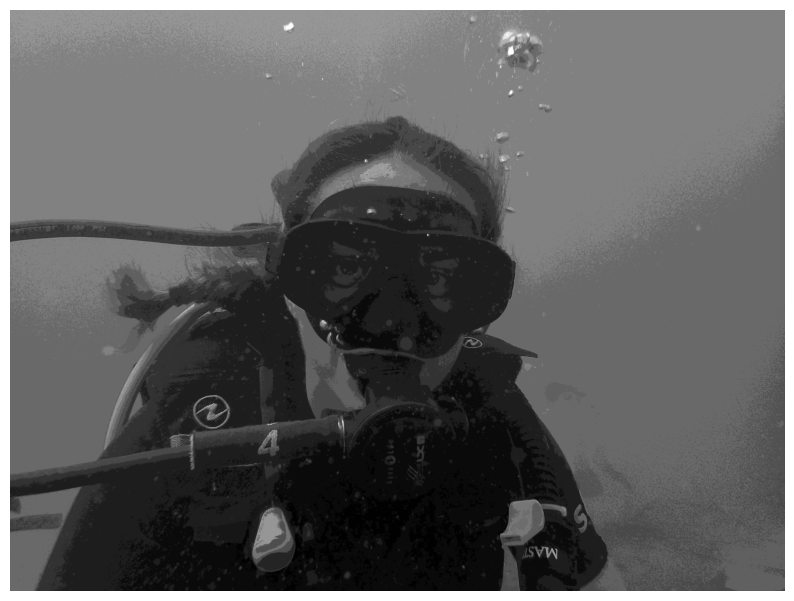

In [86]:
# Convert image to grayscale
gray = cv2.cvtColor(reduced_color_image, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray, cmap='gray')
ax.axis('off')
plt.show()


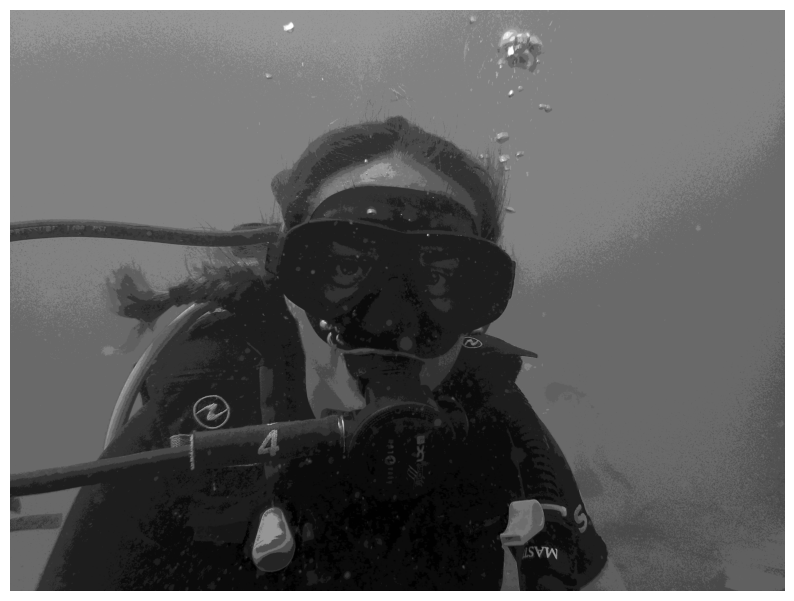

In [87]:
# Normalize image
normalized_gray = cv2.normalize(gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(normalized_gray, cmap='gray')
ax.axis('off')
plt.show()

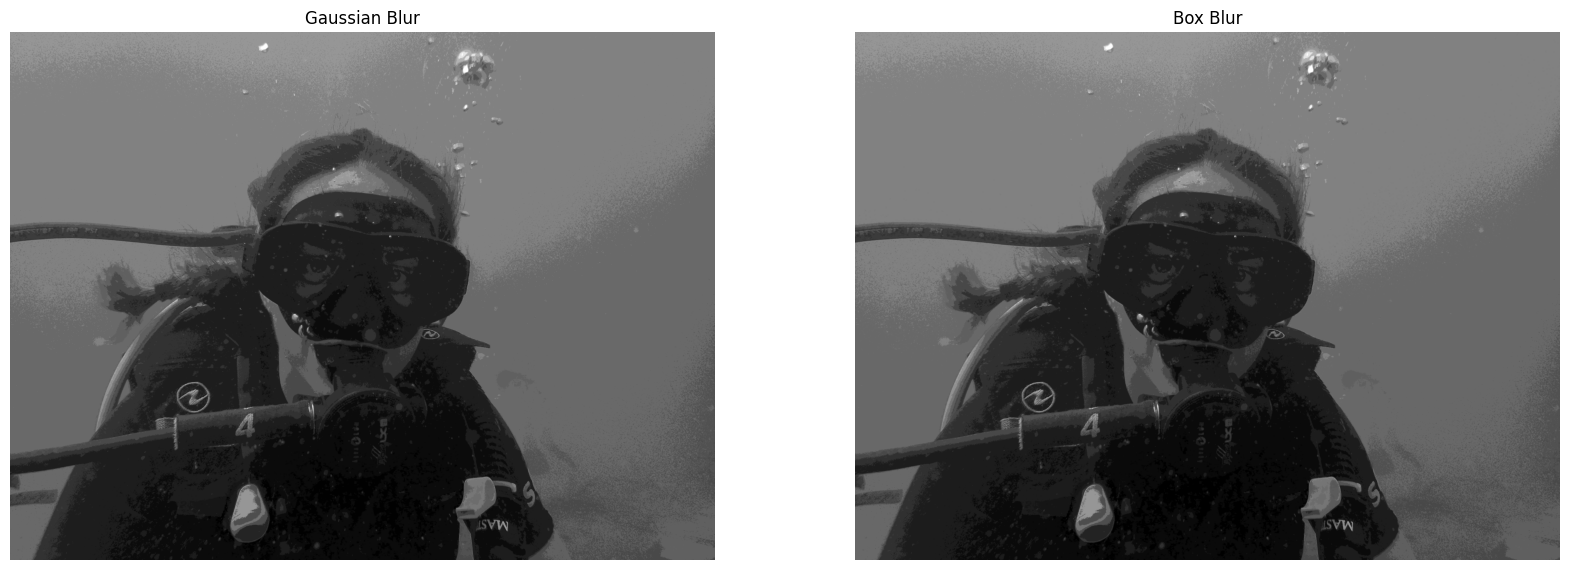

In [89]:
# Apply Gaussian Blur and Box Blur to an image

# Gaussian Blur
# Kernel for Gaussian blur is defined to emphasize the central pixel,
# which follows a normal distribution pattern. The kernel weights are arranged
# as a 3x3 matrix, where the center pixel has higher weight.
# This kernel is normalized (divided by 16) to maintain the overall brightness.
kernal_gausian_blur = np.array([[1, 2, 1], 
                                [2, 4, 2], 
                                [1, 2, 1]]) / 16
# Apply Gaussian blur kernel using cv2.filter2D.
# The -1 parameter indicates that the depth of the output image is the same as the source.
gausian_blur = cv2.filter2D(normalized_gray, -1, kernal_gausian_blur)

# Box Blur
# Kernel for Box blur is defined with equal weights in a 3x3 matrix,
# which averages the pixels uniformly. This kernel is also normalized
# by dividing by 9 to prevent changing the image brightness.
kernal_box_blur = np.array([[1, 1, 1], 
                            [1, 1, 1], 
                            [1, 1, 1]]) / 9
# Apply Box blur kernel using cv2.filter2D.
box_blur = cv2.filter2D(normalized_gray, -1 , kernal_box_blur)

# Display images using matplotlib to compare the effects of Gaussian and Box Blur.
# A figure with two subplots is created to show both images side by side.
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Display Gaussian Blur in the first subplot
ax[0].imshow(gausian_blur, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Gaussian Blur')

# Display Box Blur in the second subplot
ax[1].imshow(box_blur, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Box Blur')

plt.show()

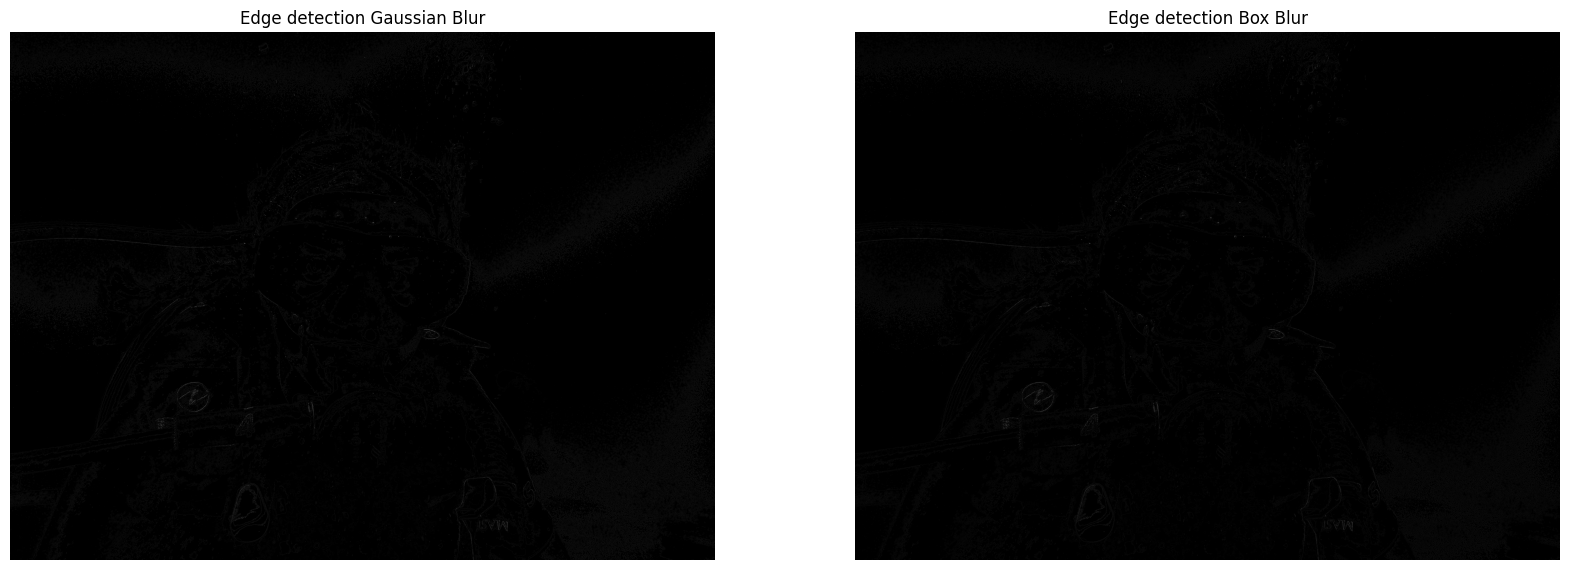

In [90]:
# Edge detection applied to images processed with Gaussian and Box blur

# Define an edge detection kernel. This kernel is designed to highlight the central pixel
# by subtracting the average value of its neighbors, effectively detecting edges.
kernal_edge_detection = np.array([[-1, -1, -1], 
                                  [-1, 8, -1], 
                                  [-1, -1, -1]])
# Apply the edge detection kernel to an image that has been blurred using a Gaussian blur.
# This operation emphasizes edges in the image, where sharp changes in intensity occur,
# by convolving the kernel with the Gaussian blurred image.
edge_detection_gausian = cv2.filter2D(gausian_blur, -1, kernal_edge_detection)

# This method also highlights edges but the initial Box blur may result in slightly different
# edge characteristics compared to the Gaussian blur.
edge_detection_box = cv2.filter2D(box_blur, -1, kernal_edge_detection)

# Set up a plot to display the results of edge detection.
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Display Gaussian Blur in the first subplot
ax[0].imshow(edge_detection_gausian, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Edge detection Gaussian Blur')

# Display Box Blur in the second subplot
ax[1].imshow(edge_detection_box, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Edge detection Box Blur')

plt.show()

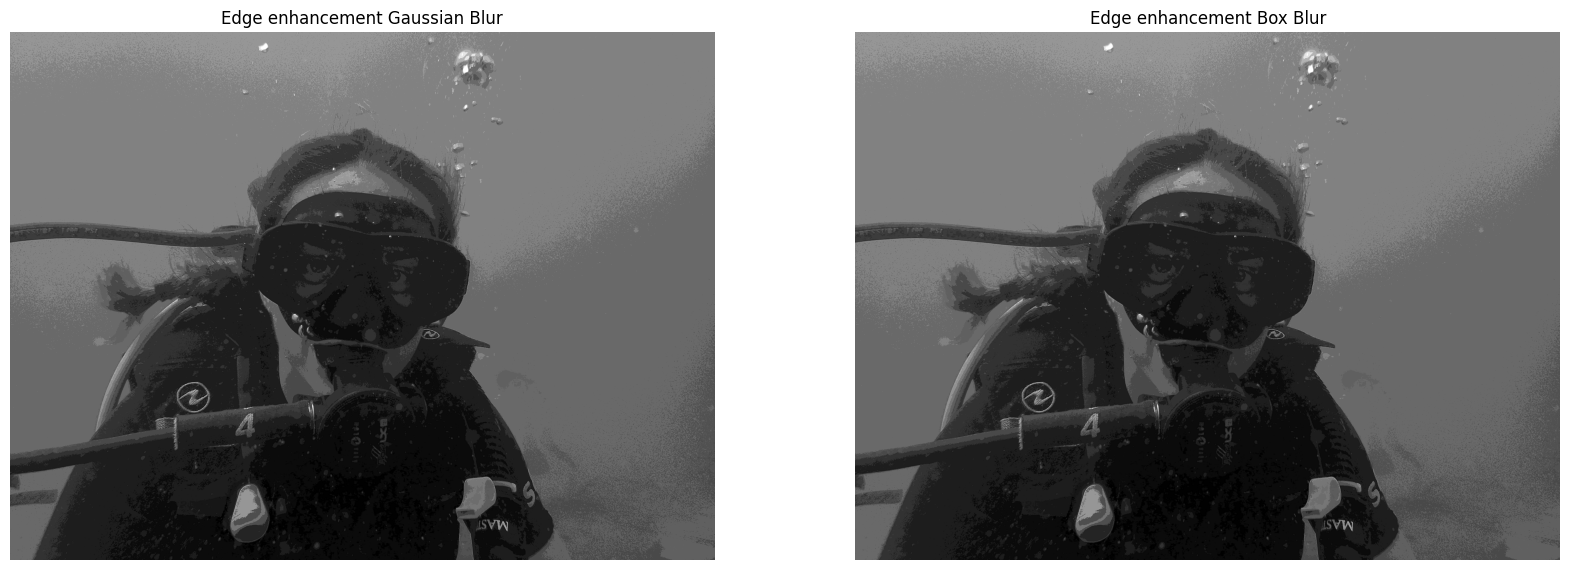

In [91]:
# Edge enhancement using a specialized kernel on images processed with Gaussian and Box blur

# Define an edge enhancement kernel. This 5x5 kernel is designed to emphasize the central pixel significantly
# more than its immediate neighbors, while slightly reducing the influence of pixels further away.
# The division by 8 is a normalization factor to balance the overall intensity and prevent image saturation.
kernal_edge_enhance = np.array([[-1, -1, -1, -1, -1],
                                [-1, 2, 2, 2, -1],
                                [-1, 2, 8, 2, -1],
                                [-1, 2, 2, 2, -1],
                                [-1, -1, -1, -1, -1]]) / 8
# Apply the edge enhancement kernel to the image that has been blurred using Box blur.
# This operation increases the contrast around edges, making them more pronounced.
edge_enhance_box = cv2.filter2D(box_blur, -1, kernal_edge_enhance)
# Apply the edge enhancement kernel to the image that has been blurred using Gaussian blur.
# Similar to the Box blur application, this enhances edges but maintains the soft characteristics
# typical of Gaussian blur.
edge_enhance_gausian = cv2.filter2D(gausian_blur, -1, kernal_edge_enhance)



# Set up a plot to display the results of edge enhancement.
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Display Gaussian Blur in the first subplot
ax[0].imshow(edge_enhance_gausian, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Edge enhancement Gaussian Blur')   

# Display Box Blur in the second subplot
ax[1].imshow(edge_enhance_box, cmap='gray') 
ax[1].axis('off')
ax[1].set_title('Edge enhancement Box Blur')

plt.show()

Text(0.5, 1.0, 'sharpen Box Blur')

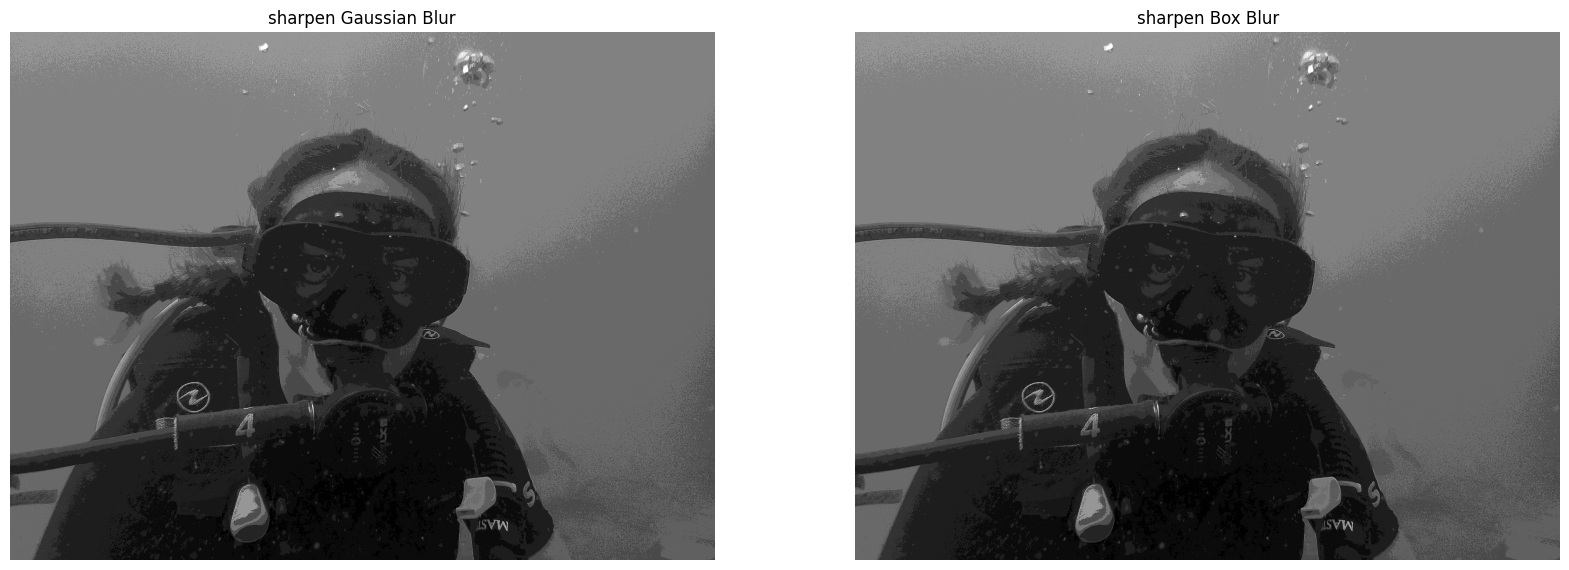

In [92]:
# Apply sharpening to images to enhance edges and details.

# Define a sharpening kernel. This kernel emphasizes the center pixel
# relative to its neighbors, increasing local contrast and enhancing perceived sharpness.
kernal_sharpen = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

# Apply the sharpening kernel to an image processed with edge enhancement after Box blur.
# The operation amplifies the differences between neighboring pixels, making the edges more distinct.
sharpen_box = cv2.filter2D(edge_enhance_box, -1, kernal_sharpen)
# Apply the sharpening kernel to an image processed with edge enhancement after Gaussian blur.
# This step similarly increases edge contrast but maintains the smooth transitions characteristic
# of Gaussian blur.
sharpen_gausian = cv2.filter2D(edge_enhance_gausian, -1, kernal_sharpen)


# Set up a plot to display the results of the sharpening.
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Display Gaussian Blur in the first subplot
ax[0].imshow(sharpen_gausian, cmap='gray')
ax[0].axis('off')
ax[0].set_title('sharpen Gaussian Blur')

# Display Box Blur in the second subplot
ax[1].imshow(sharpen_box, cmap='gray')
ax[1].axis('off')
ax[1].set_title('sharpen Box Blur')

## Summary of the Test Phase of the Project
In this part of our project, designated as the test phase, we embarked on a detailed exploration of various image processing techniques, particularly focusing on the effects of different convolution kernels on image manipulation. This phase was crucial for gaining a deeper understanding of how specific kernel designs influence image characteristics such as sharpness, edge definition, and overall image texture.

### Objectives and Activities:
The primary objective during this phase was to experiment with a variety of kernel configurations to ascertain their impacts on pre-processed images. Specifically, we employed Gaussian Blur, Box Blur, and Edge Enhancement techniques using custom-designed kernels:

Gaussian and Box Blur: We started by applying Gaussian and Box Blur techniques to smoothen images. These methods were instrumental in reducing noise and detail, which is often a preliminary step in image processing tasks like edge detection.

Edge Detection: Subsequent to blurring, we implemented edge detection to highlight significant transitions in image intensity, which helps in outlining objects and important features within the images.

Edge Enhancement: To further emphasize the detected edges, we used an edge enhancement technique, which sharpened and made these features more pronounced, providing a clearer distinction between different regions of the images.

Sharpening: Finally, we applied a sharpening filter to enhance the clarity and contrast of the images, making them visually more striking and detailed.

### Display and Comparison:
Each step of the process was visually documented using matplotlib to create side-by-side comparisons. This visual representation was crucial in assessing the effectiveness of each kernel and provided a tangible basis for deciding how to adjust the kernel parameters to achieve the desired image qualities.

### Conclusions and Future Work:
Although the initial kernels tested during this phase were instrumental in understanding the basic principles of image processing, they were not directly used in the subsequent stages of the project. Instead, based on the insights gained, we developed improved versions of these kernels. These refined kernels were then utilized in later parts of the project, where more precise and application-specific image processing was required.

This test phase was essential for setting the groundwork and guiding the development of more sophisticated image processing tools that were later deployed in the project. It provided a foundational understanding of how different kernels affect image processing outcomes, which was invaluable in tailoring our approach to meet specific project goals.

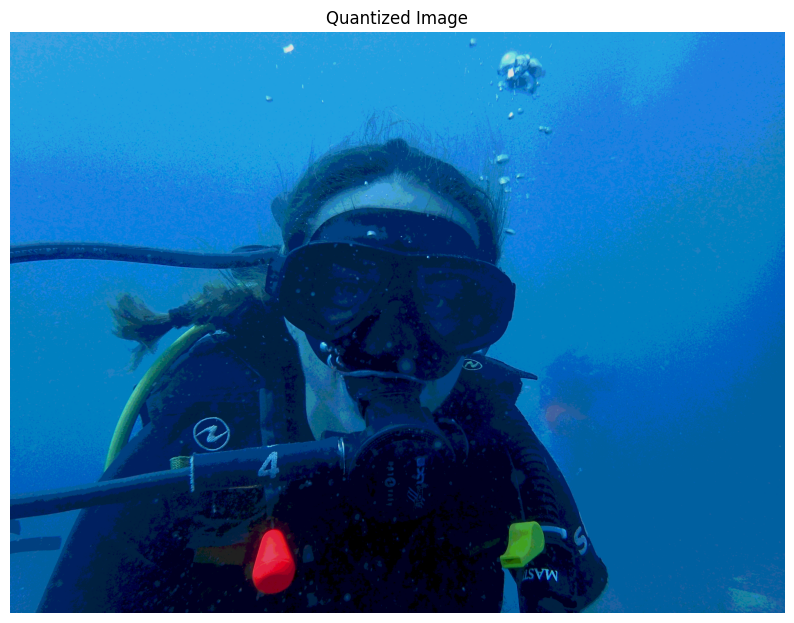

In [23]:
import numpy as np

def quantize(image, nbits):
    """Method 1: 
    Quantize an image to a lower number of bits. The image must be
    in uint8 format. The number of bits must be between 1 and 8.
    The function works for an arbitrary number of channels.
    """
    assert image.dtype == np.uint8, "Image must be uint8"
    assert nbits > 0 and nbits <= 8, "Invalid number of bits"
    
    # Split the image into its RGB channels
    r_channel, g_channel, b_channel = image[:,:,0], image[:,:,1], image[:,:,2]
    
    # Create equally sized bins for the 256 levels (per channel)
    bins = np.arange(0, 256+1, 256 // 2**nbits)
    
    # Quantize each channel separately
    ret_r = np.digitize(r_channel, bins) - 1
    ret_g = np.digitize(g_channel, bins) - 1
    ret_b = np.digitize(b_channel, bins) - 1
    
    # Multiply the bin indices with the bin width
    ret_r *= (256 // 2**nbits)
    ret_g *= (256 // 2**nbits)
    ret_b *= (256 // 2**nbits)
    
    # Merge the channels back into an RGB image
    quantized_image = np.stack((ret_r, ret_g, ret_b), axis=-1)
    
    return quantized_image.astype(np.uint8)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Lower the bit depth of the image
quantized = quantize(rgb_image, nbits=3)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(quantized)
ax.axis('off')
ax.set_title('Quantized Image')
plt.show()



# Creat a function with all the elements


# Live Stream

The code below is for the live stream of the camera. The code will take the live stream and apply the cartoon filter to the live stream.

There are two ways to achieve this:
- Using the edge_filter_kernel function, which uses the custom kernel of the gaussian blur filter
- Using the edge_filter function which uses the cv2.bilateralFilter function

In [11]:
gausian_blur_9x9_kernel = np.array([[1, 2, 3, 2, 1], [2, 4, 6, 4, 2], [3, 6, 9, 6, 3], [2, 4, 6, 4, 2], [1, 2, 3, 2, 1]]) / 81
gausian_blur_15x15_kernel = np.array([[1, 2, 3, 4, 5, 4, 3, 2, 1], [2, 4, 6, 8, 10, 8, 6, 4, 2], [3, 6, 9, 12, 15, 12, 9, 6, 3], [4, 8, 12, 16, 20, 16, 12, 8, 4], [5, 10, 15, 20, 25, 20, 15, 10, 5], [4, 8, 12, 16, 20, 16, 12, 8, 4], [3, 6, 9, 12, 15, 12, 9, 6, 3], [2, 4, 6, 8, 10, 8, 6, 4, 2], [1, 2, 3, 4, 5, 4, 3, 2, 1]]) / 331
canny_edge_detection_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
thickerLines_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
dilate_kernel = np.ones((2,2), np.uint8)

def edge_filter_kernels(image, var1, var2):
    """
    Apply edge detection to an image using the Canny edge detection algorithm. But first apply a gausian blur to the image with a 15x15 kernel.
    
    Args:
        image (np.uint8): Input image.
        var1 (int): First threshold for the hysteresis procedure.
        var2 (int): Second threshold for the hysteresis procedure.
        kernel_size (int): Size of the Gaussian kernel.
    """
    assert var1 < var2, "Threshold 1 must be less than threshold 2"
    
    # Convert the image to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.filter2D(gray, -1, gausian_blur_15x15_kernel)
    
    # Perform edge detection with adjusted thresholds for increased sensitivity
    edge_detection = cv2.Canny(blurred, var1, var2)
    
    # Dilate the edges to make lines thicker
    kernel = np.ones((2,2), np.uint8)
    dilated_edges = cv2.dilate(edge_detection, kernel, iterations=1)
    
    # Invert the dilated edges
    dilated_edges = cv2.bitwise_not(dilated_edges)
    
    return dilated_edges



def edge_filter(image, var1, var2, kernel_size=15):
    """
    Apply edge detection to an image using the Canny edge detection algorithm. But first apply a gausian blur to the image with the blur function.
    
    Args:
        image (np.uint8): Input image.
        var1 (int): First threshold for the hysteresis procedure.
        var2 (int): Second threshold for the hysteresis procedure.
        kernel_size (int): Size of the Gaussian kernel.
    """
    assert kernel_size % 2 == 1, "Kernel size must be odd"
    assert var1 < var2, "Threshold 1 must be less than threshold 2"
    assert kernel_size > 0, "Kernel size must be positive"

    # Convert the image to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    
    # Perform edge detection with adjusted thresholds for increased sensitivity
    edge_detection = cv2.Canny(blurred, var1, var2)
    
    # Dilate the edges to make lines thicker
    kernel = np.ones((2,2), np.uint8)
    dilated_edges = cv2.dilate(edge_detection, kernel, iterations=1)
    
    # Invert the dilated edges
    dilated_edges = cv2.bitwise_not(dilated_edges)
    
    return dilated_edges


def quantize(image, nbits = 3):
    """
    Quantize an image to a lower number of bits. The image must be in uint8 format. The number of bits must be between 1 and 8.
    The function works for an arbitrary number of channels.

    Args:
        image (np.uint8): Input image.
        nbits (int): Number of bits for quantization.
    """
    assert image.dtype == np.uint8, "Image must be uint8"
    assert nbits > 0 and nbits <= 8, "Invalid number of bits"
    
    # Split the image into its RGB channels
    r_channel, g_channel, b_channel = image[:,:,0], image[:,:,1], image[:,:,2]
    
    # Create equally sized bins for the 256 levels (per channel)
    bins = np.arange(0, 256+1, 256 // 2**nbits)
    
    # Quantize each channel separately
    ret_r = np.digitize(r_channel, bins) - 1
    ret_g = np.digitize(g_channel, bins) - 1
    ret_b = np.digitize(b_channel, bins) - 1
    
    # Multiply the bin indices with the bin width
    ret_r *= (256 // 2**nbits)
    ret_g *= (256 // 2**nbits)
    ret_b *= (256 // 2**nbits)
    
    # Merge the channels back into an RGB image
    quantized_image = np.stack((ret_r, ret_g, ret_b), axis=-1)
    
    return quantized_image.astype(np.uint8)


def run_camera_cv(cam_id, 
                  window_name="Webcam", 
                  show_ontop=True,
                  width=640,
                  height=480,
                  flip=False, 
                  **kwargs):
    """Run a camera feed and display it using OpenCV.

    Args:
        cam_id (int): Camera ID (usually 0).
        window_name (str): Name of the window.
        width (int): Width of the window.
        height (int): Height of the window.
        flip (bool): Flip the image horizontally.
        **kwargs: Keyword arguments for the function.
    """

    # Define the default values for the parameters
    var1 = 30 # ? This is the first threshold for the edge detection
    var2 = 70 # ? This is the second threshold for the edge detection
    kernel_size = 9 # ? This is the size of the kernel for the edge detection
    nbits = 3 # ? This is the number of bits for the quantization
    smoothing_factor=0.4 # ? This is the smoothing factor for the previous frame
    # This values are assessed by trial and error :)

    # Define the overlay text
    overlay_text_cotrols = "Controls (+/-):"
    overlay_text_var1 = "E/D - var1"
    overlay_text_var2 = "W/S - var2"
    overlay_text_kernel_size = "R/F - kernel_size"
    overlay_text_nbits = "T/G - nbits"
    overlay_text_smoothing_factor = "Z/H - smoothing_factor"
    overlay_text_quit = "Q - Quit"
    overlay_text_toggle = "A - Toggle Overlay"

    # Show overlay by default
    show_overlay = True

    cap = cv2.VideoCapture(cam_id)
    success, prev_frame = cap.read()  # Read the first frame
    prev_frame = cv2.resize(prev_frame, (width, height))  # Resize the frame


    # Adjust the camera settings (may work, or not)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)  # adjust width
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)  # adjust height

    # Create named window
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
    # Make the window always on top
    if show_ontop:
        cv2.setWindowProperty(window_name, cv2.WND_PROP_TOPMOST, 1)

    try:
        while True:
            # Read image from capturing device
            success, img = cap.read()
            if not success:
                break
            if flip:
                img = cv2.flip(img, 1)

            # Smooth the current frame with the previous frame
            img_smooth = cv2.addWeighted(img, 1 - smoothing_factor, prev_frame, smoothing_factor, 0)

            # Update the previous frame for the next iteration
            prev_frame = img_smooth.copy()

            img_smooth = cv2.GaussianBlur(img_smooth, (5, 5), 0)
            img = cv2.GaussianBlur(img, (5, 5), 0)
            
            # Apply cartoon filter to get white pixels
            # ? This is with the old edge_filter function which uses not the smoothing kernel but the function
            white_pixels = edge_filter(img_smooth, var1, var2, kernel_size) 
            # ? This is with the new edge_filter_kernels function which uses the smoothing kernel
            #white_pixels = edge_filter_kernels(img_smooth, var1, var2)

            # Apply quantize filter to the original image
            quantized_image = quantize(img, nbits)

            # Merge the white pixels of cartoon filter with quantized image
            img = cv2.bitwise_and(quantized_image, quantized_image, mask=white_pixels)

            # Add overlay text
            overlay_text = f"var1: {var1} var2: {var2} kernel_size: {kernel_size} nbits: {nbits} smoothing_factor: {smoothing_factor}"

            if show_overlay:
                # Create a background for the overlay text (seethrough black rectangle)
                cv2.rectangle(img, (0, 0), (180, 190), (0, 0, 0), -1)
                cv2.rectangle(img, (0, 0), (430, 30), (0, 0, 0), -1)

                cv2.putText(img, overlay_text, (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)

                cv2.putText(img, overlay_text_cotrols, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_toggle, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_smoothing_factor, (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_kernel_size, (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_var1, (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_var2, (10, 140), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_nbits, (10, 160), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_quit, (10, 180), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)

            watermark_text = "by Noirin / Michael"
            cv2.putText(img, watermark_text, (10, 470), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (125, 205, 100), 1)
            
            # Display the image in the named window
            cv2.imshow(window_name, img)
            # Wait and fetch for key input (the above window should be selected)
            key = cv2.waitKey(1) & 0xFF
            # Quit if "q" or "Q" is pressed.
            if key in (ord("q"), ord("Q")): 
                cap.release()
                break
            elif key in (ord("w"), ord("W")) and var2 < 255:
                var2 += 10
            elif key in (ord("s"), ord("S")) and var2 > 0:
                var2 -= 10
            elif key in (ord("e"), ord("E")) and var1 < 255:
                var1 += 10
            elif key in (ord("d"), ord("D")) and var1 > 0:
                var1 -= 10
            elif key in (ord("r"), ord("R")) and kernel_size < 20:
                kernel_size += 2
            elif key in (ord("f"), ord("F")) and kernel_size >= 3:
                kernel_size -= 2
            elif key in (ord("t"), ord("T")) and nbits < 8:
                nbits += 1
            elif key in (ord("g"), ord("G")) and nbits > 1:
                nbits -= 1
            elif key in (ord("z"), ord("Z")) and smoothing_factor < 1.0:
                smoothing_factor += 0.1
            elif key in (ord("h"), ord("H")) and smoothing_factor > 0.0:
                smoothing_factor -= 0.1
            elif key in (ord("a"), ord("A")):
                show_overlay = not show_overlay

            # clear log and print new values
            clear_output(wait=True)

            print(f"var1: {var1}")
            print(f"var2: {var2}")
            print(f"kernel_size: {kernel_size}")
            print(f"nbits: {nbits}")
            print(f"smoothing_factor: {smoothing_factor}")

    except KeyboardInterrupt:
        pass
    finally:
        # We should always release the camera
        cap.release()
        # Comment out the following lines if you want to keep the window open
        cv2.destroyAllWindows() 
        cv2.waitKey(1)

In [12]:
###################
# Run the camera! #
###################

# Choose the camera
cam_id = 0

# Window name
window_name = "Webcam Cartoon Filter"

# Flip the image
flip = True

# Run the camera!
run_camera_cv(cam_id, 
              window_name=window_name, 
              flip=flip)

var1: 30
var2: 70
kernel_size: 9
nbits: 3
smoothing_factor: 0.4
